In [17]:
import import_ipynb
from PyEMD import CEEMDAN
import math
import tensorflow as tf
import numpy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn import metrics
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### import the libraries
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from math import sqrt

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [18]:
df = pd.read_csv('C:/Users/irene/Downloads/T1.csv')

#i=1
#df= df[df.month = i]

new_data = df.dropna(axis = 0, how ='any')
new_data.describe()
cap=max(new_data['LV ActivePower (kW)'])
cap

3618.73291

In [19]:
CUDA_VISIBLE_DEVICES=""

In [20]:
i=1

In [30]:
import numpy as np
x=[i]
baru=new_data.loc[new_data['month'].isin(x)]
barus=baru.reset_index(drop=True)
barus1=barus.dropna()
    
datas=barus1['LV ActivePower (kW)']
datas_wind=pd.DataFrame(datas)
dfs=datas
s = dfs.values

from PyEMD import EMD

emd=EMD()
IMFs = emd(s)

full_imf=pd.DataFrame(IMFs)
data_decomp=full_imf.T
    
#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
    

pred_test=[]
test_ori=[]
pred_train=[]
train_ori=[]

look_back=6
data_partition=0.8
epoch=100
batch_size=64
neuron=128
lr=0.001
optimizer='Adam'

0    3.736109
228.73637446567434
135.199808690373


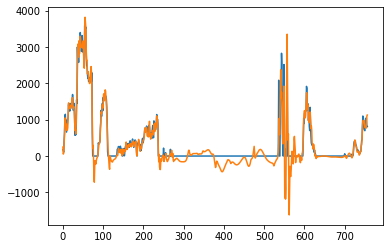

In [31]:
for col in data_decomp:

    datasetss2=pd.DataFrame(data_decomp[col])
    datasets=datasetss2.values
    train_size = int(len(datasets) * data_partition)
    test_size = len(datasets) - train_size
    train, test = datasets[0:train_size], datasets[train_size:len(datasets)]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    X_train=pd.DataFrame(trainX)
    Y_train=pd.DataFrame(trainY)
    X_test=pd.DataFrame(testX)
    Y_test=pd.DataFrame(testY)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X= sc_X.fit_transform(X_train)
    y= sc_y.fit_transform(Y_train)
    X1= sc_X.fit_transform(X_test)
    y1= sc_y.fit_transform(Y_test)
    y=y.ravel()
    y1=y1.ravel()  

    import numpy

    trainX = numpy.reshape(X, (X.shape[0],X.shape[1],1))
    testX = numpy.reshape(X1, (X1.shape[0],X1.shape[1],1))

    numpy.random.seed(1234)
    import tensorflow as tf
    tf.random.set_seed(1234)


    import os 
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout, Activation
    from keras.layers.recurrent import LSTM
    
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from keras.models import Sequential
    from keras.layers import LSTM, Dense,SimpleRNN
    from keras.callbacks import EarlyStopping



    model = Sequential()
    model.add(SimpleRNN(units=neuron,input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse')

    model.fit(trainX, y, epochs = epoch,batch_size = batch_size,verbose=0)

    # make predictions
    y_pred_train = model.predict(trainX)
    y_pred_test = model.predict(testX)

    # make predictions

    y_pred_test= numpy.array(y_pred_test).ravel()
    y_pred_test=pd.DataFrame(y_pred_test)
    y1=pd.DataFrame(y1)
    y=pd.DataFrame(y)
    y_pred_train= numpy.array(y_pred_train).ravel()
    y_pred_train=pd.DataFrame(y_pred_train)

    y_test= sc_y.inverse_transform (y1)
    y_train= sc_y.inverse_transform (y)

    y_pred_test1= sc_y.inverse_transform (y_pred_test)
    y_pred_train1= sc_y.inverse_transform (y_pred_train)


    pred_test.append(y_pred_test1)
    test_ori.append(y_test)
    pred_train.append(y_pred_train1)
    train_ori.append(y_train)


result_pred_test= pd.DataFrame.from_records(pred_test)
result_pred_train= pd.DataFrame.from_records(pred_train)

a=result_pred_test.sum(axis = 0, skipna = True) 
b=result_pred_train.sum(axis = 0, skipna = True) 

dataframe=pd.DataFrame(dfs)
dataset=dataframe.values

train_size = int(len(dataset) * data_partition)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
X_train=pd.DataFrame(trainX)
Y_train=pd.DataFrame(trainY)
X_test=pd.DataFrame(testX)
Y_test=pd.DataFrame(testY)

sc_X = StandardScaler()
sc_y = StandardScaler() 
X= sc_X.fit_transform(X_train)
y= sc_y.fit_transform(Y_train)
X1= sc_X.fit_transform(X_test)
y1= sc_y.fit_transform(Y_test)
y=y.ravel()
y1=y1.ravel()


trainX = numpy.reshape(X, (X.shape[0], 1, X.shape[1]))
testX = numpy.reshape(X1, (X1.shape[0], 1, X1.shape[1]))

numpy.random.seed(1234)
tf.random.set_seed(1234)
    #tf.random.set_random_seed(1234)
    
y1=pd.DataFrame(y1)
y=pd.DataFrame(y)

y_test= sc_y.inverse_transform (y1)
y_train= sc_y.inverse_transform (y)


a= pd.DataFrame(a)    
y_test= pd.DataFrame(y_test)    

plt.plot(y_test)
plt.plot(a)

#summarize the fit of the model
mape=numpy.mean((numpy.abs(y_test-a))/cap)*100

rmse= sqrt(mean_squared_error(y_test,a))
mae=metrics.mean_absolute_error(y_test,a)

    
print(mape.to_string())
print(rmse)
print(mae)
